In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.io
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
X = scipy.io.loadmat('./YaleFaceDataBase/Yale_64x64.mat')

In [3]:
X = np.array(X['fea'])

In [4]:
print(X.shape)

(165, 4096)


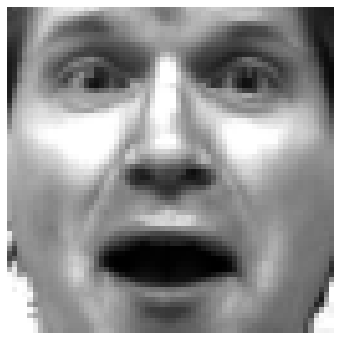

In [5]:
img = plt.imshow(X[1,:].reshape(64,64).T)
plt.axis('off')
img.set_cmap('gray')
plt.show()

Xmean = X.mean(axis=0, keepdims=True)

In [6]:
# Xm = X - Xmean

Xm = X

img = plt.imshow(Xm[1,:].reshape(64,64).T)
plt.axis('off')
img.set_cmap('gray')
plt.show()

# Using <X, X> as kernel function

In [7]:
K = Xm.T.dot(Xm)

In [8]:
print(K.shape)

(4096, 4096)


In [9]:
eigvals, eigvecs = np.linalg.eig(K)

In [10]:
eigvalues = eigvals.flatten()
print(eigvalues)

[ 5.22331243e+05 -9.42314869e+03 -9.35822235e+03 ...  1.17763867e+01
  1.99452856e+01  7.73733500e+01]


In [11]:
idx = eigvalues.argsort()[::-1]   
eigvalues = eigvalues[idx]
eigvectors = eigvecs[:,idx]

In [12]:
print(eigvalues)

[522331.24310791   9391.81995886   9362.6195466  ...  -9331.6270829
  -9358.22234917  -9423.14868904]


In [13]:
print(eigvalues[2046])

4.695148778315221


In [25]:
i = 0
count = 0
while(i<len(eigvalues)):
        if eigvalues[i] == complex():
            if abs(eigvalues[i]) < 1:
                count +=1
                break
        if eigvalues[i]<1:
                count +=1
                break
        i += 1
r = len(eigvalues) - count

In [28]:
print(count)
print(r)

1
4095


In [29]:
eigvalues_r = np.array(eigvalues[:r])
print(eigvalues_r)

[522331.24310791   9391.81995886   9362.6195466  ...  -9322.67048884
  -9331.6270829   -9358.22234917]


In [40]:
D = (abs(eigvalues_r))**(1/2)
D = np.diag(D)

In [41]:
print(D.shape)

(4095, 4095)


In [42]:
Vt = eigvectors[:,:r].T

In [43]:
print(Vt.shape)

(4095, 4096)


In [44]:
Y = np.matmul(D,Vt)

# In sample and Outoff sample Projection
##  y = Ut*Φ(x) = (Σ^−1)*Vt*Φ(X)t*Φ(x) = (Σ^−1)*Vt*Φ(X)t*Φ(x) = (Σ^−1)*Vt*K

In [52]:
print(X.shape)

(165, 4096)


In [56]:
x = X[1,:]

(165,)


In [54]:
y = np.matmul(np.matmul(np.linalg.inv(D),Vt),K)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 165 is different from 4096)

In [49]:
print(y.shape)

(4095, 4096)


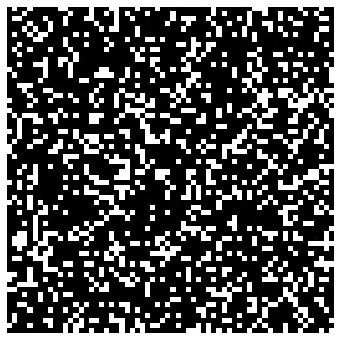

In [47]:
img = plt.imshow(y[1,:].reshape(64,64).T.astype('uint8'))
img.set_cmap('gray')
plt.axis('off')
plt.show()

 # Reconstruction is not possible because Φ(X) is not known
 ## X̂ = UY = UΣVt = Φ(X)V(Σ^-)ΣVt = Φ(X)VVt